# Práctica 6: Análisis clúster

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn import preprocessing, cluster
from sklearn.metrics.pairwise import cosine_similarity

## 0. Ejecutar los ejemplos


Demo of affinity propagation clustering algorithm

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007


Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


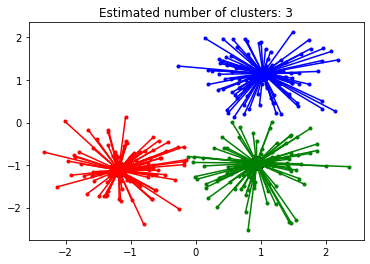

In [1]:
from examples import plot_affinity_propagation


K-means Clustering

The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.




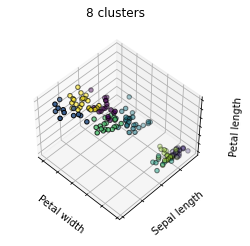

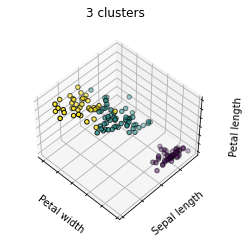

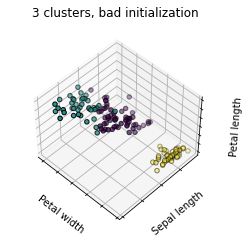

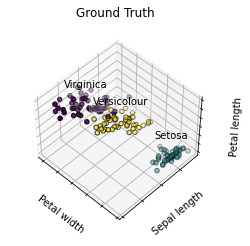

In [2]:
from examples import plot_cluster_iris


Demo of DBSCAN clustering algorithm

Finds core samples of high density and expands clusters from them.


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


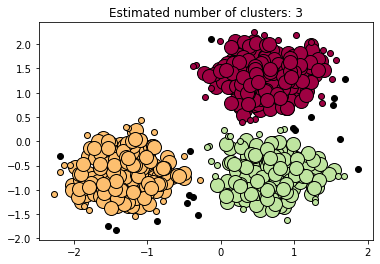

In [3]:
from examples import plot_dbscan

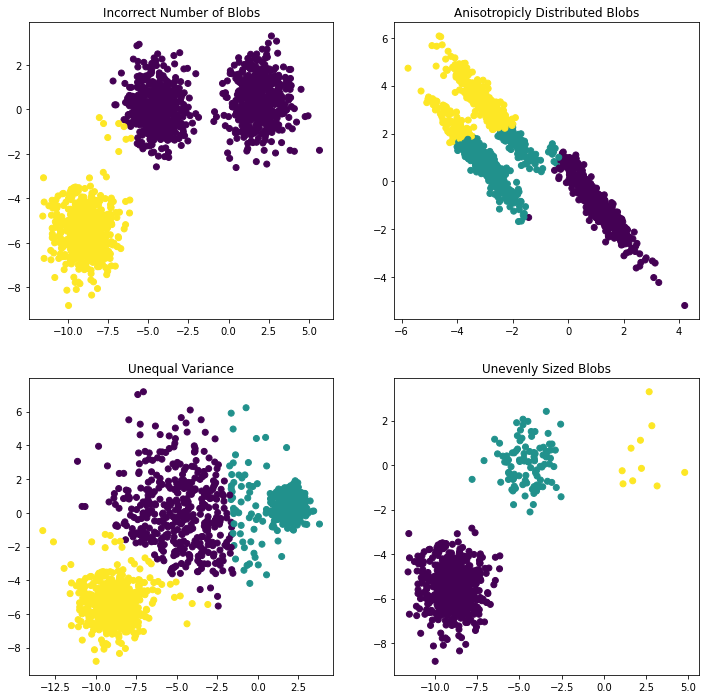

In [4]:
from examples import plot_kmeans_assumptions


A demo of the mean-shift clustering algorithm

Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.


number of estimated clusters : 3


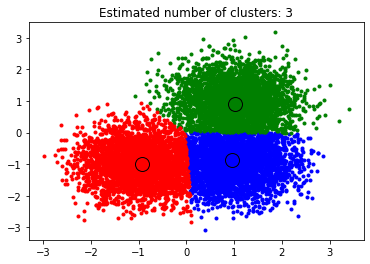

In [5]:
from examples import plot_mean_shift


Spectral clustering for image segmentation

In this example, an image with connected circles is generated and
spectral clustering is used to separate the circles.

In these settings, the :ref:`spectral_clustering` approach solves the problem
know as 'normalized graph cuts': the image is seen as a graph of
connected voxels, and the spectral clustering algorithm amounts to
choosing graph cuts defining regions while minimizing the ratio of the
gradient along the cut, and the volume of the region.

As the algorithm tries to balance the volume (ie balance the region
sizes), if we take circles with different sizes, the segmentation fails.

In addition, as there is no useful information in the intensity of the image,
or its gradient, we choose to perform the spectral clustering on a graph
that is only weakly informed by the gradient. This is close to performing
a Voronoi partition of the graph.

In addition, we use the mask of the objects to restrict the graph to the
outline of the objects. 

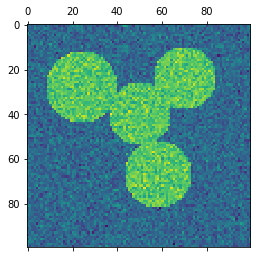

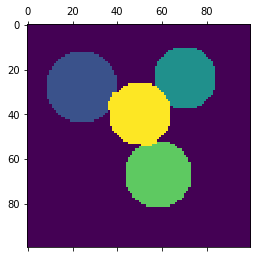

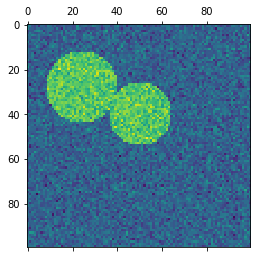

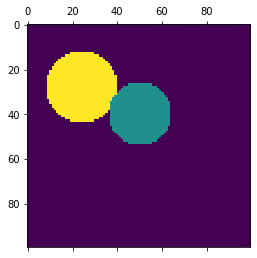

In [6]:
from examples import plot_segmentation_toy

## 1. Seleccionar datasets

Escogemos entre los ya usados:
- Iris
- Digits
- Avila
- Accents
- Wine quality

In [36]:
accent_df = pd.read_csv('datasets/accent.csv', header=0)
avila_df = pd.read_csv('datasets/avila.csv', header=0)
digits_df = pd.read_csv('datasets/digits.csv', header=None)
iris_df = pd.read_csv('datasets/iris.csv', header=None)
wine_df = pd.read_csv('datasets/wine.csv', header=0)

In [37]:
accent_df = accent_df[accent_df.columns.to_list()[1:]+[accent_df.columns.to_list()[0]]]

### Eliminar clase

In [41]:
accent = accent_df.iloc[:, :-1].values
avila = avila_df.iloc[:, :-1].values
digits = digits_df.iloc[:, :-1].values
iris = iris_df.iloc[:, :-1].values
wine = wine_df.iloc[:, :-1].values

In [43]:
dfs = [accent_df, avila_df, digits_df, iris_df, wine_df]
n_classes = [len(np.unique(df.iloc[:, -1])) for df in dfs]

In [49]:
def get_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    return np.column_stack([model.children_, model.distances_, counts]).astype(float)

In [113]:
def evaluate_model(data, model):
    similarity_matrix = cosine_similarity(data)
    similarity_matrix = similarity_matrix[~np.eye(similarity_matrix.shape[0],dtype=bool)].reshape(similarity_matrix.shape[0],-1)
    linkage_matrix = get_linkage_matrix(model)
    
    return linkage_matrix

In [114]:
m = cluster.AgglomerativeClustering(linkage='average', distance_threshold=10, n_clusters=None)
m.fit(accent)

AgglomerativeClustering(distance_threshold=10, linkage='average',
                        n_clusters=None)

In [116]:
(evaluate_model(accent, m)).shape

(328, 4)

In [122]:
m.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': 10,
 'linkage': 'average',
 'memory': None,
 'n_clusters': None}

In [121]:
m.connectivity